In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import csv
import seaborn as sns

In [2]:
path =r'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/SF_email_reports'
filenames = glob.glob(path + "/*.csv")

In [3]:
#create a list of filenames from the reports
EM_Results = []
for filename in filenames:
    EM_Results.append(filename[70:])

In [4]:
#create a function that reads the csv files and extract the email header
import csv
def subjectline(i):
    file = open(path + "/"+ i,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    #print(header)
    line2 =next(csvreader)
    #print(line2)
    SUBJ=line2[7]
    NameofEmail = i[:-4]
    return ["The subject line used in " + NameofEmail+ " was " + SUBJ]

def DROP_RATE(dr):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen= name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TClick= name['UniqueClicked'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = ["The Stats for " + dr[:-4] + " are as follows:"]
    Stats = ["Total Emails Sent:"+ str(TSent),"Total Unique Opened: "+ str(TOpen),"Total Unsubscribed: "+ str(TUnsubsc),"Total Unique Clicks: "+str(TClick)]
    return [NameofFile,Stats]

#for analysis I need to put the actual numbers into the dataframe
def DROP_RATE_STATS(dr):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen= name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TClick= name['UniqueClicked'].sum()
    TBounce= name['Bounced'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = dr[:-4]
    Stats = [TSent,TOpen,TUnsubsc,TClick,TBounce]
    return [NameofFile, Stats]

#this will create a nested list of the email name and the stats
ESTAT = []
for item in EM_Results:
    ESTAT.append(DROP_RATE_STATS(item))
    
#This will flatten the nested list

def lflatten(TheList):
    listIsNested = True

    while listIsNested:                 #outer loop
        keepChecking = False
        Temp = []

        for element in TheList:         #inner loop
            if isinstance(element,list):
                Temp.extend(element)
                keepChecking = True
            else:
                Temp.append(element)

        listIsNested = keepChecking     #determine if outer loop exits
        TheList = Temp[:]

    return TheList

#put the function into the loop for the results
Flat_ESTAT = []
for item in ESTAT:
    Flat_ESTAT.append(lflatten(item))
    
    

In [5]:
#Create a function that retrieves the Email Interest Rate
def READ_RATE(dt):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','UniqueOpened']]
    Open = name['UniqueOpened'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = dr[:-4] 
    Stats = [Open]
    return [NameofFile,Stats]

NESTED Functions to create, plot and annotate the Email Results

In [6]:
#create a function that makes a pandas data frame and converts str obj to datetime
#SFR  is SalesForce Email Results Report
import csv
SFR = 'Career_Ctr.csv'
def FRAME(SFR):
    name = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','UniqueOpened']]
    df = pd.DataFrame(name)
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    return (df)

def TITLE(SFR):
    file = open(path + "/"+ SFR,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    line2 =next(csvreader)
    EmailFileName = SFR[:-4]
    return EmailFileName

def HEADER(SFR):
    file = open(path + "/"+ SFR,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    line2 =next(csvreader)
    SUBJ=line2[7]
    return SUBJ
def EMdf(SFR):
    a= FRAME(SFR)
    b= TITLE(SFR)
    c= HEADER(SFR)
    d = a.plot(x="IntervalStartTime", y = 'UniqueOpened')
    d.set(title = 'Email Response Rate for ' + b)
    d.annotate('Email Header:\n' + c,
           xy = (100,180),xycoords='figure points')
    return d

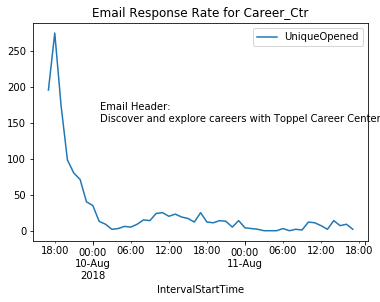

In [7]:
EMdf(SFR)

In [43]:
 def FRAME(SFR):
    name = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','UniqueOpened']]
    df = pd.DataFrame(name)
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    return (df)

def TITLE(SFR):
    file = open(path + "/"+ SFR,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    line2 =next(csvreader)
    EmailFileName = SFR[:-4]
    return EmailFileName

def HEADER(SFR):
    file = open(path + "/"+ SFR,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    line2 =next(csvreader)
    SUBJ=line2[7]
    return SUBJ

def OPENRATE(SFR):
    name = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen = name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TBounce= name['Bounced'].sum()
    FSent =TSent - TBounce
    FOpenR = round((TOpen/FSent*100),1)
    FOPENR = str(FOpenR) + "%"
    return FOPENR


def EMdf(SFR):
    a= FRAME(SFR)
    b= TITLE(SFR)
    c= HEADER(SFR)
    f= OPENRATE(SFR)
    d = a.plot(x="IntervalStartTime", y = 'UniqueOpened')
    d.set(title = 'Email Response Rate for ' + b)
    d.annotate('Email Header:\n' + c + '\n Open Rate: ' + f,
               xy = (100,180),xycoords='figure points')
    return d

In [44]:
SFR = 'Quest_abt_Money.csv'

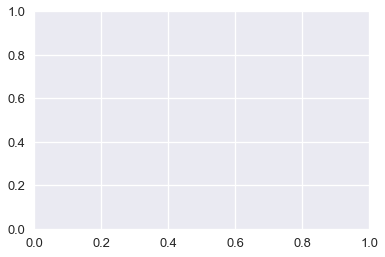

In [45]:
sns.set_style('darkgrid')
sns.set_context('talk')
color = sns.color_palette("Dark2",6)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

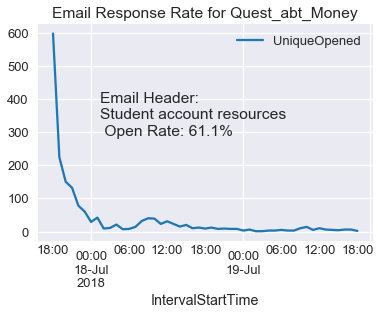

In [47]:
for fn in [FRAME,TITLE,HEADER,OPENRATE,EMdf]:
    fn(SFR)

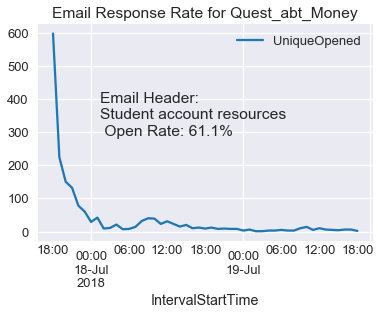

In [48]:
def lp(SFR):
    for fn in [FRAME,TITLE,HEADER,OPENRATE,EMdf]:
        fn(SFR)
lp(SFR)

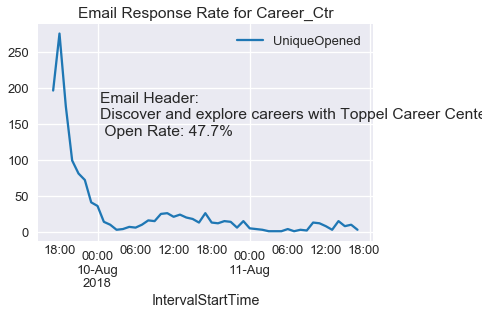

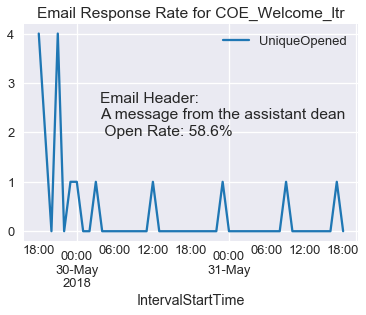

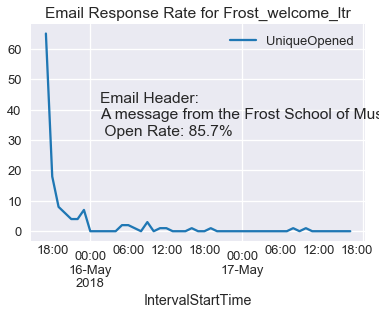

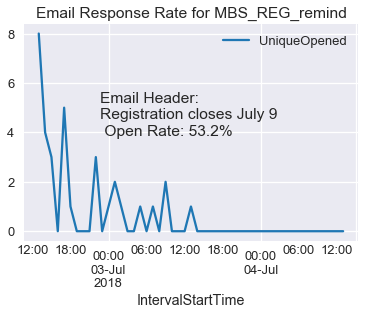

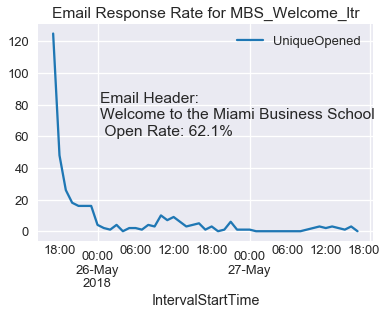

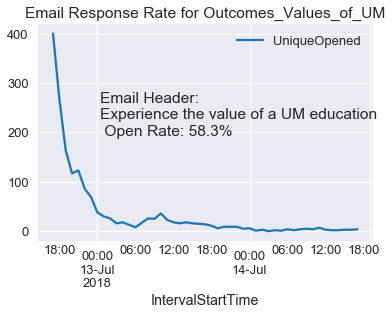

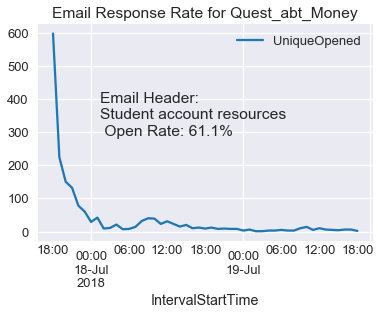

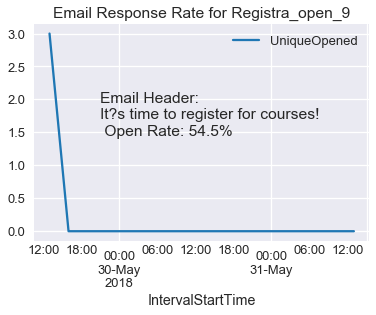

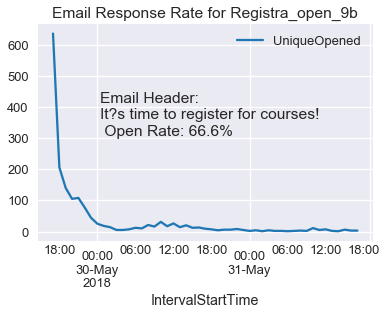

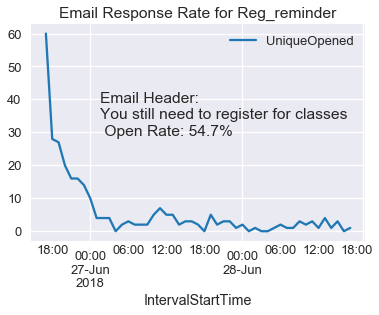

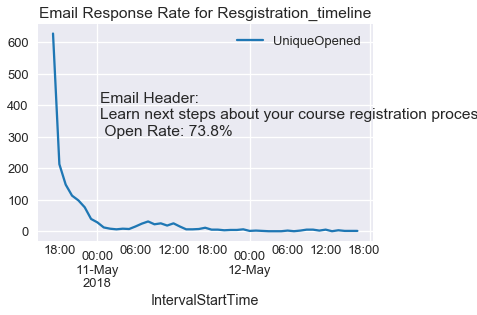

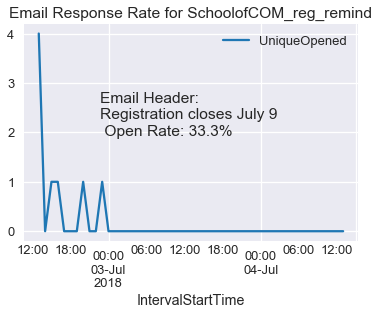

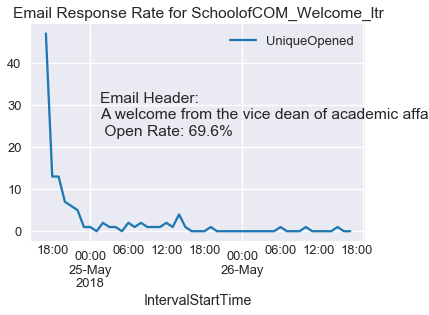

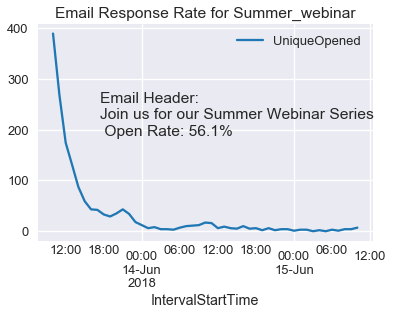

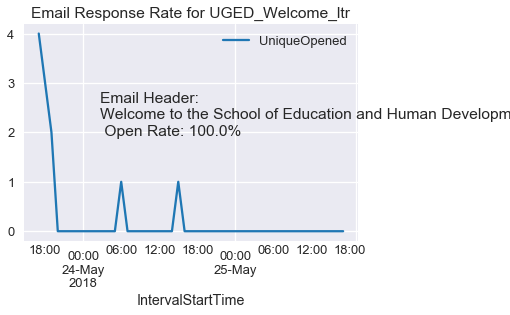

In [49]:
for item in EM_Results:     
    lp(item)
 